# Happy/Sad Detection

#### General Steps to Follow

1. Problem Statement
2. Importing Packages
3. Data Collection
4. Checking the Data

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 1) Problem statement
- Given an input image of a human, the goal is to determin whether this human is happy or sad.

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 2) Importing Packages


In [2]:
import numpy as np
import os
import imghdr
import matplotlib.pyplot as plt

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 3) Data Collection

Dataset Sources:
- Facial Expressions Training Data:
   - I collected only happy and sad images from this data set.
   - Download Link: https://www.kaggle.com/datasets/noamsegal/affectnet-training-data
- Google Images:
   - I just searched for happy and sad images and downloaded them.

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 4) Checking the Data

* There are 5399 happy images and 3226 sad images

### 4.1 Setup Paths

In [3]:
happy_path = "../my data/happy" # path of happy images folder
sad_path = "../my data/sad"     # path of sad images folder

### --------------------------------------------------------------------------------

### 4.2 Getting the Happy and Sad Images

In [4]:
happy = []  # Happy Images
sad = []    # Sad Images

# happy images
for img_name in os.listdir(happy_path):
    path = happy_path + "/" + img_name
    image = plt.imread(path)
    happy.append(image)
    del image
    del path
        
# sad images
for img_name in os.listdir(sad_path):
    path = sad_path + "/" + img_name
    image = plt.imread(path)
    sad.append(image)
    del image
    del path

print("Number of happy images =", len(happy))
print("Number of sad images =", len(sad))

Number of happy images = 5399
Number of sad images = 3226


#### Visualizing Some Images

Happy Image


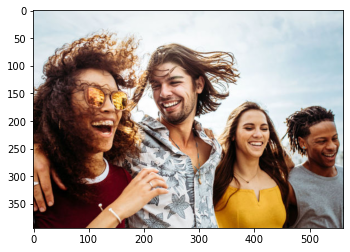

In [80]:
print("Happy Image")
plt.imshow(happy[10])
plt.show()

Sad Image


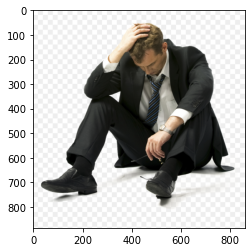

In [96]:
print("Sad Image")
plt.imshow(sad[10])
plt.show()

### --------------------------------------------------------------------------------

### 4.3 Checking Image Extensions

* Some files may not be a valid image. So, I have to check if these files exist and remove them.

In [28]:
extensions = []
none = []

# happy images
for img_name in os.listdir(happy_path):
    path = happy_path + "/" + img_name
    ext = imghdr.what(path)
    if ext == None:
        none.append(path)
    if ext not in extensions:
        extensions.append(ext)
        
# sad images
for img_name in os.listdir(sad_path):
    path = sad_path + "/" + img_name
    ext = imghdr.what(path)
    if ext == None:
        none.append(path)
    if ext not in extensions:
        extensions.append(ext)
        
print("The extensions found are:",extensions)

The extensions found are: ['jpeg', 'png', None, 'webp']


In [29]:
none

['../my data/happy/220px-Happy_People_A_Year_in_the_Taiga_poster.jpg',
 '../my data/happy/2560px-Happy_People.jpg',
 '../my data/happy/guilherme-stecanella-375176-unsplash.jpg',
 '../my data/happy/Happy20People.jpg',
 '../my data/happy/sjnv_cnh7ugnaddm7so6sq.jpg',
 '../my data/sad/origin-144.jpg',
 '../my data/sad/sad-person-pictures-2560-x-1707-a8ginomrbkhyh3ri.jpg',
 '../my data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg',
 '../my data/sad/stock-photo-sad-person-sketch-art-on-paper-2301532683.jpg']

#### Some Comments
* All the files in happy and sad folders are valid images

### --------------------------------------------------------------------------------

### 4.4 Checking Images Shapes

In [82]:
shapes = []

# happy images
for image in happy:
    shapes.append(image.shape)
        
# sad images
for image in sad:
    shapes.append(image.shape)

In [83]:
shapes = np.array(shapes, dtype = object)
unique_values, counts = np.unique(shapes, return_counts=True)

sorted_indices = np.argsort(counts)[::-1]  # Sort in descending order

unique_values = unique_values[sorted_indices]
counts = counts[sorted_indices]

print("Total number of images =", len(shapes))
print("There are %d unique shapes:\n" % unique_values.shape[0])

for i in range(unique_values.shape[0]):
    print("Shape:", unique_values[i])
    print("Count:",counts[i], "\n")

Total number of images = 8625
There are 226 unique shapes:

Shape: (96, 96, 3)
Count: 8135 

Shape: (183, 275, 3)
Count: 65 

Shape: (100, 100, 3)
Count: 54 

Shape: (168, 300, 3)
Count: 47 

Shape: (194, 259, 3)
Count: 16 

Shape: (225, 225, 3)
Count: 10 

Shape: (159, 318, 3)
Count: 7 

Shape: (168, 299, 3)
Count: 7 

Shape: (275, 183, 3)
Count: 6 

Shape: (100, 100, 4)
Count: 6 

Shape: (162, 311, 3)
Count: 5 

Shape: (720, 1280, 3)
Count: 5 

Shape: (183, 276, 3)
Count: 4 

Shape: (177, 284, 3)
Count: 4 

Shape: (1080, 1920, 3)
Count: 4 

Shape: (163, 310, 3)
Count: 4 

Shape: (267, 189, 3)
Count: 3 

Shape: (1280, 1920, 3)
Count: 3 

Shape: (180, 280, 3)
Count: 3 

Shape: (360, 540, 3)
Count: 3 

Shape: (188, 268, 3)
Count: 3 

Shape: (417, 626, 3)
Count: 3 

Shape: (534, 800, 3)
Count: 3 

Shape: (667, 1000, 3)
Count: 3 

Shape: (160, 315, 3)
Count: 2 

Shape: (450, 800, 3)
Count: 2 

Shape: (533, 800, 3)
Count: 2 

Shape: (180, 281, 3)
Count: 2 

Shape: (626, 626, 3)
Count: 2 



#### Some Comments
* The most common shapes are:
   - (96, 96, 3)   , 8135 images have this shape
   - (183, 275, 3) , 65 images have this shape
   - (100, 100, 3) , 54 images have this shape
   - (168, 300, 3) , 47 images have this shape
   - (194, 259, 3) , 16 images have this shape
   - (225, 225, 3) , 10 images have this shape

### --------------------------------------------------------------------------------

### 4.5 Checking Number of Channels in the Images

In [90]:
channels = []

# happy images
for image in happy:
    try:
        channels.append(image.shape[2])
    except:
        channels.append(1)
        
# sad images
for image in sad:
    try:
        channels.append(image.shape[2])
    except:
        channels.append(1)

In [97]:
channels = np.array(channels)
unique_values, counts = np.unique(channels, return_counts=True)

sorted_indices = np.argsort(counts)[::-1]  # Sort in descending order

unique_values = unique_values[sorted_indices]
counts = counts[sorted_indices]

print("Total number of images =", len(shapes))

for i in range(len(unique_values)):
    print("Number of images that have %d channels: %d" % (unique_values[i], counts[i]))

Total number of images = 8625
Number of images that have 3 channels: 8599
Number of images that have 4 channels: 23
Number of images that have 1 channels: 3


#### Some Comments
* There are 8599 RGB images and 3 grayscale images

### --------------------------------------------------------------------------------

### 4.6 Checking if the Images Normalized or not

* I will check if the pixels' values are between 0 and 1 or 0 and 255

In [11]:
normalized = 0

for image in happy:
    if image.max() > 1:
        continue
    else:
        normalized += 1
        
for image in sad:
    if image.max() > 1:
        continue
    else:
        normalized += 1

print("Total number of images =", len(happy)+len(sad))
print("%d images are normalized" % normalized)

Total number of images = 8625
5026 images are normalized


#### Some Comments
* Not all the images are normalized.